<a href="https://colab.research.google.com/github/LucaAPiattelli/UNI/blob/main/PY_07_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

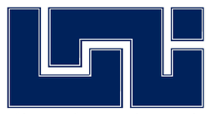

</center>

<center>
<font color="#091f60">
<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Avanzada con Power BI, R y Python

</font>
</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

<font color="#091f60">
<h1><b>
Agrupación - Clustering

</font>

### Instalar librerías necesarias

In [ ]:
pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.clustering import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Extracción de datos

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/UNI/main/Datasets/Agrupacion/clientes.csv")
data.head()

,genero,casado,edad,graduado,profesion,experiencia_laboral,nivel_gasto,dependientes
0,Masculino,No,22,No,Sanidad,1,bajo,4
1,Femenino,Si,67,Si,Ingenieria,1,bajo,1
2,Masculino,Si,67,Si,Abogado,0,alto,2
3,Masculino,Si,56,No,Artista,0,medio,2
4,Masculino,No,32,Si,Sanidad,1,bajo,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7239 entries, 0 to 7238
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   genero               7239 non-null   object
 1   casado               7239 non-null   object
 2   edad                 7239 non-null   int64 
 3   graduado             7239 non-null   object
 4   profesion            7239 non-null   object
 5   experiencia_laboral  7239 non-null   int64 
 6   nivel_gasto          7239 non-null   object
 7   dependientes         7239 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 452.6+ KB


In [ ]:
train = data.sample(frac=0.75, random_state=0)
test = data.drop(train.index)

In [ ]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [ ]:
print("Datos para Modelar: " + str(train.shape))
print("Datos no vistos para Predicciones: " + str(test.shape))

Datos para Modelar: (5429, 8)
Datos no vistos para Predicciones: (1810, 8)


# Comparar modelos

In [ ]:
modelo = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(7239, 8)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,7
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(7239, 45)"
9,CPU Jobs,-1


In [ ]:
modelos = models()
modelos

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


## K-Means

In [ ]:
kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4969,22588.1021,0.6016,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
kmeans_resultados = assign_model(kmeans)
kmeans_resultados.head()

,genero,casado,edad,graduado,profesion,experiencia_laboral,nivel_gasto,dependientes,Cluster
0,Masculino,No,22,No,Sanidad,1,bajo,4,Cluster 2
1,Femenino,Si,67,Si,Ingenieria,1,bajo,1,Cluster 1
2,Masculino,Si,67,Si,Abogado,0,alto,2,Cluster 1
3,Masculino,Si,56,No,Artista,0,medio,2,Cluster 0
4,Masculino,No,32,Si,Sanidad,1,bajo,3,Cluster 2


In [ ]:
plot_model(kmeans, "cluster")

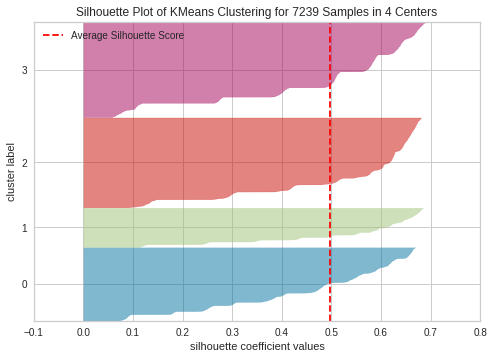

In [ ]:
plot_model(kmeans, plot = 'silhouette')

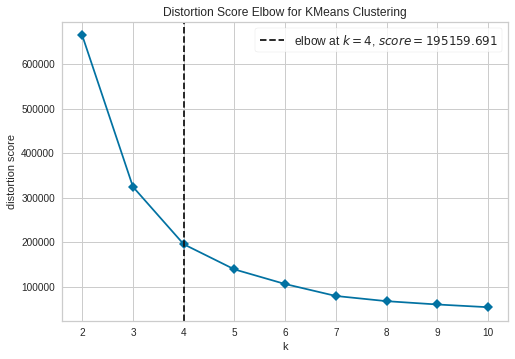

In [ ]:
plot_model(kmeans, plot = 'elbow')

## Hirarchical Clustering

In [ ]:
hclust = create_model('hclust')
print(hclust)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4815,21754.2026,0.6007,0,0,0


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)


In [ ]:
hclust_resultados = assign_model(hclust)
hclust_resultados.head()

,genero,casado,edad,graduado,profesion,experiencia_laboral,nivel_gasto,dependientes,Cluster
0,Masculino,No,22,No,Sanidad,1,bajo,4,Cluster 1
1,Femenino,Si,67,Si,Ingenieria,1,bajo,1,Cluster 2
2,Masculino,Si,67,Si,Abogado,0,alto,2,Cluster 2
3,Masculino,Si,56,No,Artista,0,medio,2,Cluster 0
4,Masculino,No,32,Si,Sanidad,1,bajo,3,Cluster 1


In [ ]:
plot_model(hclust, "cluster")

![UNI](https://posgrado.uni.edu.ni/wp-content/uploads/2017/02/logo_opt-2.png)